In [2]:
import pandas as pd
from pathlib import Path
import logging
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_directory = Path(r'../data/')
filename = data_directory / 'preprocessed' / 'github_results.csv'
df = pd.read_csv(filename).set_index('id').drop_duplicates(subset='name')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 129 entries, 23389271.0 to 6309729.0
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         129 non-null    int64  
 1   node_id            129 non-null    object 
 2   name               129 non-null    object 
 3   full_name          129 non-null    object 
 4   private            129 non-null    bool   
 5   owner              129 non-null    object 
 6   html_url           129 non-null    object 
 7   description        129 non-null    object 
 8   fork               129 non-null    bool   
 9   url                129 non-null    object 
 10  forks_url          129 non-null    object 
 11  keys_url           129 non-null    object 
 12  collaborators_url  129 non-null    object 
 13  teams_url          129 non-null    object 
 14  hooks_url          129 non-null    object 
 15  issue_events_url   129 non-null    object 
 16  events_ur

In [5]:
ids_to_check = [
23468876,
236661502,
104569445,
148657183,
80764246,
202580388,
186872119,
275794599,
69400415,
278175856,
198119545,
261086130,
86715491,
70790978,
1678015,
62207281,
65324353,
46355863,
213480284,
247768523,
98871435,
11591264,
118264731,
123977530,
156401841,
198628357,
1885237,
184809315,
25037129,
90264407,
71996613,
64942583,
25928850,
127010483,
253993655,
18031064,
82291672,
59207352,
73872834,
110717885,
]

In [6]:
len(ids_to_check)

40

In [7]:
not_provided = '{"key": "none", "name": "None", "spdx_id": "NOASSERTION", "url": "None", "node_id": "0"}'
licenses_values = []
licenses_index = []
for idx, license in df.loc[ids_to_check,:].license.str.replace('"','\\"').str.replace("'", "\"").fillna(not_provided).iteritems():
    #print(license)
    try:
        license_data = json.loads(license)
        licenses_values.append(license_data)
        licenses_index.append(idx)
    except json.JSONDecodeError as e:
        if '"key": "other"' in license:
            license_data = {"key": "other", "name": "Other", "spdx_id": "NOASSERTION", "url": None, "node_id": "MDc6TGljZW5zZTA="}
            licenses_values.append(license_data)
            licenses_index.append(idx)
        else:
            print(idx, license, e)

In [8]:
licenses = pd.DataFrame(data=licenses_values, index=licenses_index)

In [9]:
licenses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 23468876 to 110717885
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      40 non-null     object
 1   name     40 non-null     object
 2   spdx_id  40 non-null     object
 3   url      33 non-null     object
 4   node_id  40 non-null     object
dtypes: object(5)
memory usage: 1.9+ KB


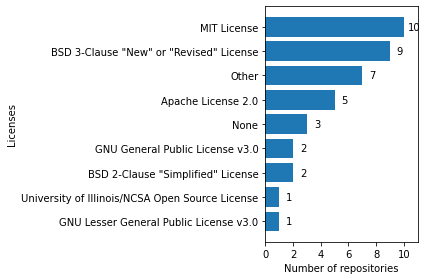

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
s = licenses.groupby('name').size().sort_values()

rects = ax.barh(s.index, s.values)

ax.set_ylabel('Licenses')
ax.set_xlabel('Number of repositories')
# ax.set_title('Number of repositories per license')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, -5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects)
ax.set_xlim(0,s.max()*1.1)
ax.set_xticks(range(0,int(s.max()*1.1),2))
fig.tight_layout()

#plt.savefig('../latex/images/nb-items-per-license.pdf')